# Data Loading

In [1]:
!pip install 'pycaret[full]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score, r2_score
from pycaret.regression import*
from google.colab import files

drive.mount('/content/drive')

dfVanco = pd.read_excel('/content/drive/MyDrive/data/original_dataset.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install shap

In [5]:
import warnings
import numba

warnings.filterwarnings("ignore", category=numba.NumbaDeprecationWarning)

import pandas as pd
import numpy as np
import shap
import math
from pycaret.regression import*
from math import isnan
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
print(dfVanco)

     Case_no  Gender  Age  Weight  Height        BMI  Initial VCM_daily_dose  \
0         43       0   79    69.0   158.0  27.639801                    1000   
1         89       0   74    72.0   163.0  27.099251                    1000   
2        108       0   74    52.0   146.0  24.394821                    1000   
3        144       0   83    48.0   153.0  20.504934                    1000   
4        177       0   88    40.0   148.0  18.261505                    1000   
5         24       1   80    73.0   165.0  26.813590                    1000   
6         49       0   83    37.0   145.0  17.598098                    1100   
7         75       0   77    40.0   163.0  15.055139                    1200   
8        214       0   81    33.0   148.0  15.065741                    1200   
9        226       0   71    70.0   168.0  24.801587                    1200   
10        70       1   57    43.0   172.0  14.534884                    1200   
11       102       0   91    41.0   148.

# Pre-processing

In [7]:
# This code is rounding certain columns to a specified decimal place using the round() function in pandas

dfVanco['BMI'] = round(dfVanco['BMI'], 1)
dfVanco['WBC'] = round(dfVanco['WBC'], 1)
dfVanco['Crcl'] = round(dfVanco['Crcl'], 1)
dfVanco['Clvanco'] = round(dfVanco['Clvanco'], 1)
dfVanco['Half_life'] = round(dfVanco['Half_life'], 1)
dfVanco['Ke'] = round(dfVanco['Ke'], 3)

In [8]:
dfVanco[:3]

,Case_no,Gender,Age,Weight,Height,BMI,Initial VCM_daily_dose,ICU,WBC,Hb,PLT,CRP,eGFR,BUN,SCr,Albumin,TP,UA,NSAIDs,ARB,ACEi,Fusosemide,Diuretics,Vasopressors,LAB,AG,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life
0,43,0,79,69.0,158.0,27.6,1000,0,5.9,7.3,134,43.23,90,35.6,0.45,2.5,5.6,4.5,0,0,1,0,0,0,0,0,1,0,0,110.4,4.8,48.3,0.096,7.2
1,89,0,74,72.0,163.0,27.1,1000,0,9.5,11.4,286,72.22,58,11.4,0.95,3.5,6.4,3.5,0,0,0,0,0,0,0,0,1,0,0,59.1,2.7,50.4,0.053,13.0
2,108,0,74,52.0,146.0,24.4,1000,0,97.1,7.2,14,55.73,71,30.2,0.79,2.7,5.9,6.7,0,0,0,0,1,0,0,0,0,0,0,51.3,2.3,36.4,0.047,14.8


In [9]:
dfVanco=dfVanco.drop(columns='Case_no')
dfVanco[:3]

,Gender,Age,Weight,Height,BMI,Initial VCM_daily_dose,ICU,WBC,Hb,PLT,CRP,eGFR,BUN,SCr,Albumin,TP,UA,NSAIDs,ARB,ACEi,Fusosemide,Diuretics,Vasopressors,LAB,AG,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life
0,0,79,69.0,158.0,27.6,1000,0,5.9,7.3,134,43.23,90,35.6,0.45,2.5,5.6,4.5,0,0,1,0,0,0,0,0,1,0,0,110.4,4.8,48.3,0.096,7.2
1,0,74,72.0,163.0,27.1,1000,0,9.5,11.4,286,72.22,58,11.4,0.95,3.5,6.4,3.5,0,0,0,0,0,0,0,0,1,0,0,59.1,2.7,50.4,0.053,13.0
2,0,74,52.0,146.0,24.4,1000,0,97.1,7.2,14,55.73,71,30.2,0.79,2.7,5.9,6.7,0,0,0,0,1,0,0,0,0,0,0,51.3,2.3,36.4,0.047,14.8


count     166.000000
mean     1963.765060
std       500.652737
min      1000.000000
25%      1940.000000
50%      2000.000000
75%      2000.000000
max      5700.000000
Name: Initial VCM_daily_dose, dtype: float64

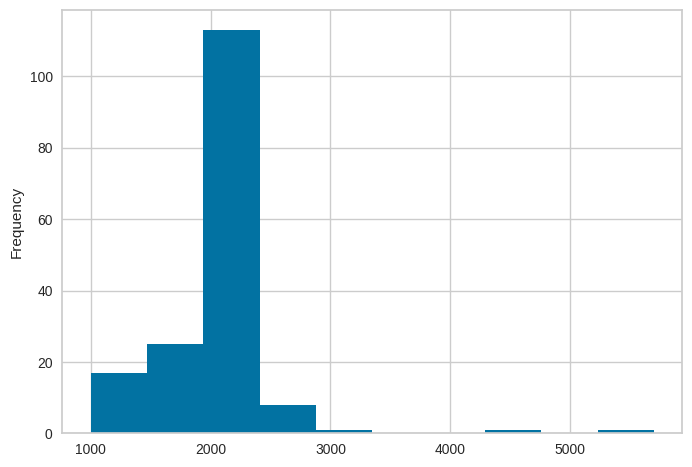

In [10]:
dfVanco['Initial VCM_daily_dose'].plot.hist()
dfVanco['Initial VCM_daily_dose'].describe()

# Outlier Removal

In [11]:
# To remove outliers, remove the top and bottom 5% of the dataset

q1 = dfVanco['Initial VCM_daily_dose'].quantile(0.05)
q2 = dfVanco['Initial VCM_daily_dose'].quantile(0.5)
q3 = dfVanco['Initial VCM_daily_dose'].quantile(0.95)
iqr = q3 - q1

print(f'iqr: {iqr}')
print(f'low threshold : {q1-1.5*iqr}')
print(f'high theshold : {q3+1.5*iqr}')

iqr: 1300.0
low threshold : -750.0
high theshold : 4450.0


In [12]:
outlier1 = dfVanco['Initial VCM_daily_dose']>(q3+1.5*iqr)
outlier2 = dfVanco['Initial VCM_daily_dose']<(q1-1.5*iqr)

# data: 164


<Axes: ylabel='Frequency'>

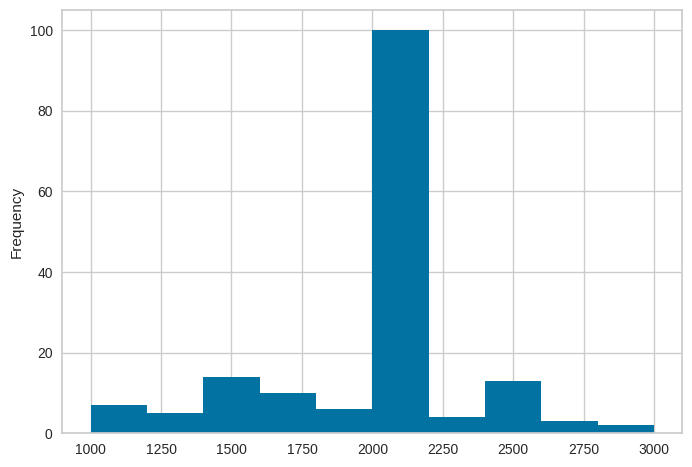

In [13]:
a = list(dfVanco[outlier2].index)
b = list(dfVanco[outlier1].index)
a.extend(b)
df1 = dfVanco.drop(a)

# df1 is the dataset after removing the top and bottom 5% of the dataset to remove outliers
print(f'# data: {len(df1)}')
df1['Initial VCM_daily_dose'].plot.hist(bins=10)

In [14]:
df1.describe()

,Gender,Age,Weight,Height,BMI,Initial VCM_daily_dose,ICU,WBC,Hb,PLT,CRP,eGFR,BUN,SCr,Albumin,TP,UA,NSAIDs,ARB,ACEi,Fusosemide,Diuretics,Vasopressors,LAB,AG,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.573171,69.701220,60.856707,161.765854,23.247561,1925.152439,0.158537,10.019512,10.276220,246.323171,79.428963,84.048780,15.990854,0.714024,3.302439,6.126829,3.434756,0.274390,0.103659,0.006098,0.140244,0.030488,0.018293,0.006098,0.006098,0.164634,0.006098,0.054878,83.449390,3.662195,42.599695,0.074140,10.356707
std,0.496132,13.215152,11.752599,9.032419,4.047698,353.886148,0.366362,8.898955,1.895615,118.723163,75.809988,10.592163,8.279984,0.225562,0.581193,0.805586,1.432257,0.447573,0.305751,0.078087,0.348303,0.172452,0.134418,0.078087,0.078087,0.371986,0.078087,0.228440,29.255713,1.229209,8.226819,0.024304,3.550359
min,0.000000,22.000000,33.000000,135.000000,14.300000,1000.000000,0.000000,0.100000,5.500000,14.000000,1.000000,51.000000,3.800000,0.240000,1.600000,3.700000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.700000,1.100000,23.100000,0.024000,3.800000
25%,0.000000,63.000000,53.000000,155.000000,20.600000,1890.000000,0.000000,6.325000,9.000000,167.000000,14.927500,82.000000,10.400000,0.550000,2.900000,5.600000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.500000,2.900000,37.100000,0.058000,8.400000
50%,1.000000,73.000000,60.000000,163.000000,23.300000,2000.000000,0.000000,8.900000,10.100000,238.000000,54.790000,90.000000,14.000000,0.700000,3.300000,6.150000,3.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.850000,3.550000,42.000000,0.073000,9.500000
75%,1.000000,79.000000,69.000000,169.250000,25.700000,2000.000000,0.000000,11.350000,11.525000,320.500000,130.005000,90.000000,19.825000,0.832500,3.700000,6.700000,4.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.325000,4.100000,48.300000,0.083000,11.900000
max,1.000000,91.000000,100.000000,180.000000,33.300000,3000.000000,1.000000,97.100000,14.700000,646.000000,300.000000,90.000000,56.400000,1.540000,5.100000,7.900000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,216.800000,9.200000,70.000000,0.184000,28.800000


# Modeling training using pycaret, an auto machine library

In [15]:
reg1 = setup(data=df1, target='Initial VCM_daily_dose',
             train_size = 0.8,
             fold = 5, fold_shuffle = True,
             use_gpu=True,
             session_id = 42
            )

,Description,Value
0,Session id,42
1,Target,Initial VCM_daily_dose
2,Target type,Regression
3,Original data shape,"(164, 33)"
4,Transformed data shape,"(164, 33)"
5,Transformed train set shape,"(131, 33)"
6,Transformed test set shape,"(33, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


# Evaluation

In [16]:
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,213.1982,107018.1676,324.7718,0.1405,0.1880,0.1286,0.3880
lightgbm,Light Gradient Boosting Machine,241.5854,112739.0369,332.2827,0.0909,0.1914,0.1412,0.1240
rf,Random Forest Regressor,223.7567,113796.5242,334.8708,0.0850,0.1950,0.1343,1.1520
catboost,CatBoost Regressor,230.4799,113844.6089,334.3818,0.0889,0.1954,0.1382,14.5240
ada,AdaBoost Regressor,229.7622,114563.9985,335.1575,0.0863,0.1936,0.1372,0.3060
br,Bayesian Ridge,234.2260,115319.1758,337.3491,0.0674,0.1980,0.1419,0.1600
huber,Huber Regressor,220.7969,125404.9419,352.7258,-0.0170,0.2087,0.1400,0.3220
omp,Orthogonal Matching Pursuit,241.0297,125413.9385,352.9780,-0.0328,0.2063,0.1476,0.0760
dummy,Dummy Regressor,235.6235,125955.9228,353.1710,-0.0168,0.2089,0.1475,0.1520
en,Elastic Net,253.7400,129943.5931,357.2337,-0.0450,0.2070,0.1518,0.1020


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [17]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,172.0221,89976.3895,299.9606,0.2912,0.1843,0.1139
1,183.6236,69715.2506,264.0365,0.2208,0.1524,0.1087
2,270.5127,142981.3852,378.1288,0.0380,0.2094,0.1472
3,221.9522,128962.3257,359.1132,0.1109,0.2063,0.1413
4,181.3184,83082.0580,288.2396,0.2298,0.1798,0.1156
Mean,205.8858,102943.4818,317.8957,0.1781,0.1864,0.1254
Std,36.5532,28095.3766,43.4255,0.0910,0.0207,0.0157


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [18]:
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
predictions = predict_model(best_tune)
predictions[:5]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,241.1974,105707.4193,325.1268,0.1315,0.1771,0.1380


,Gender,Age,Weight,Height,BMI,ICU,WBC,Hb,PLT,CRP,...,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose,prediction_label
135,1,84,85.0,170.0,29.400000,0,10.4,10.3,192,129.479996,...,0,0,0,83.699997,3.7,59.500000,0.074,9.4,2000,2007.555487
115,1,84,68.0,170.0,23.500000,0,6.7,12.5,259,47.610001,...,0,0,0,67.800003,3.0,47.599998,0.061,11.4,2000,2023.853162
131,1,76,68.0,175.0,22.200001,0,9.2,11.5,230,39.410000,...,0,0,0,94.400002,4.1,47.599998,0.083,8.4,2000,2071.346032
55,0,58,60.0,160.0,23.400000,1,19.9,11.0,393,90.570000,...,0,0,0,98.400002,4.3,42.000000,0.086,8.0,2000,1998.173686
95,1,40,69.0,166.0,25.000000,0,18.1,13.0,280,163.240005,...,0,0,0,121.300003,5.3,48.299999,0.105,6.6,2000,2036.220125


In [20]:
df_result = pd.DataFrame()
df_result['true'] = predictions['Initial VCM_daily_dose']
df_result['prediction'] = predictions['prediction_label']

# Since vancomycin is prescribed in units of 100 anyway, the numerical value is rounded up to 100.
def round_to_nearest_fifty(number):
    return round(number / 50.0) * 50

rounded_values = [round_to_nearest_fifty(num) for num in predictions['prediction_label']]
predictions["prediction_label"]= rounded_values
predictions

,Gender,Age,Weight,Height,BMI,ICU,WBC,Hb,PLT,CRP,...,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose,prediction_label
135,1,84,85.0,170.0,29.400000,0,10.4,10.3,192,129.479996,...,0,0,0,83.699997,3.7,59.500000,0.074,9.400000,2000,2000
115,1,84,68.0,170.0,23.500000,0,6.7,12.5,259,47.610001,...,0,0,0,67.800003,3.0,47.599998,0.061,11.400000,2000,2000
131,1,76,68.0,175.0,22.200001,0,9.2,11.5,230,39.410000,...,0,0,0,94.400002,4.1,47.599998,0.083,8.400000,2000,2050
55,0,58,60.0,160.0,23.400000,1,19.9,11.0,393,90.570000,...,0,0,0,98.400002,4.3,42.000000,0.086,8.000000,2000,2000
95,1,40,69.0,166.0,25.000000,0,18.1,13.0,280,163.240005,...,0,0,0,121.300003,5.3,48.299999,0.105,6.600000,2000,2050
29,1,58,63.0,168.0,22.299999,0,7.3,11.1,223,24.450001,...,0,0,0,56.500000,2.5,44.099998,0.082,8.500000,1600,2000
157,1,71,70.0,170.0,24.200001,0,9.4,10.6,177,179.339996,...,1,0,0,82.800003,3.7,49.000000,0.073,9.500000,2500,2050
51,0,75,55.0,154.0,23.200001,0,10.9,10.1,383,5.340000,...,0,0,0,69.199997,3.1,38.500000,0.062,11.200000,2000,2000
101,1,65,67.0,167.0,24.000000,0,8.0,13.5,285,7.550000,...,0,0,0,90.599998,4.0,46.900002,0.080,8.700000,2000,2050
145,1,48,80.0,171.0,27.400000,0,8.7,10.1,396,113.989998,...,0,0,0,152.600006,6.6,56.000000,0.131,5.300000,2300,2000


In [21]:
df_result['prediction']

135    2007.555487
115    2023.853162
131    2071.346032
55     1998.173686
95     2036.220125
29     1975.344562
157    2051.056657
51     1976.986221
101    2039.870315
145    2024.522200
19     1980.268815
85     1638.200696
15     2019.613864
66     1960.596171
24     2000.841945
30     1831.280865
132    1883.687596
105    2096.465141
152    2031.064895
16     1535.573482
75     1864.311616
18     1821.083830
12     1918.628636
9      1836.806006
31     1964.324092
155    2012.708891
98     1999.624005
56     1821.995045
134    1986.274837
160    1972.078726
139    1881.710616
78     1963.245349
60     1883.324713
Name: prediction, dtype: float64

In [22]:
df_result['prediction']=predictions["prediction_label"]
df_result['prediction']

135    2000
115    2000
131    2050
55     2000
95     2050
29     2000
157    2050
51     2000
101    2050
145    2000
19     2000
85     1650
15     2000
66     1950
24     2000
30     1850
132    1900
105    2100
152    2050
16     1550
75     1850
18     1800
12     1900
9      1850
31     1950
155    2000
98     2000
56     1800
134    2000
160    1950
139    1900
78     1950
60     1900
Name: prediction, dtype: int64

# Results

In [23]:
df_result

,true,prediction
135,2000,2000
115,2000,2000
131,2000,2050
55,2000,2000
95,2000,2050
29,1600,2000
157,2500,2050
51,2000,2000
101,2000,2050
145,2300,2000


In [24]:
df_result['accuracy'] = np.where(abs(df_result['true'] - df_result['prediction']) <=50, 1, 0)
accuracy = round((len(df_result.loc[df_result['accuracy'] == 1])/ len(df_result)) * 100, 1)
print('Accuracy: ', accuracy, '%')


Accuracy:  33.3 %


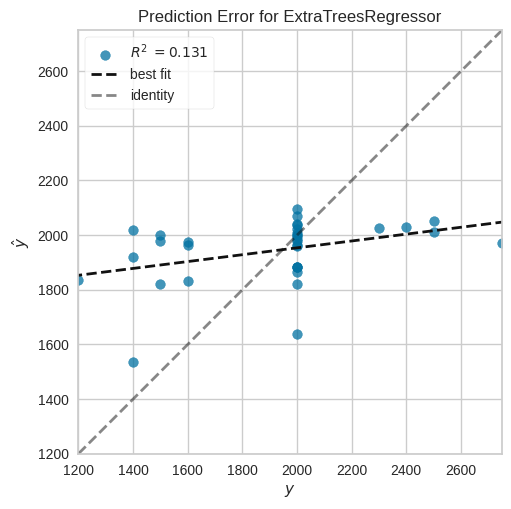

In [25]:
plot_model(best_tune, plot = 'error')

# Log Transformation of 'Initial VCM_daily_dose'

In [26]:
# Applying a log transformation to the 'Initial VCM_daily_dose' column in the df_D2 dataframe.
# This process is often used in data science to manage skewed data or to linearize relationships that are exponential in nature.

In [27]:
df1['Initial VCM_daily_dose_log'] = df1['Initial VCM_daily_dose'].apply(lambda x: math.log(x))

In [28]:
df2=df1.drop(columns='Initial VCM_daily_dose')

In [29]:
df2

,Gender,Age,Weight,Height,BMI,ICU,WBC,Hb,PLT,CRP,...,AG,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose_log
0,0,79,69.0,158.0,27.6,0,5.9,7.3,134,43.23,...,0,1,0,0,110.4,4.8,48.3,0.096,7.2,6.907755
1,0,74,72.0,163.0,27.1,0,9.5,11.4,286,72.22,...,0,1,0,0,59.1,2.7,50.4,0.053,13.0,6.907755
2,0,74,52.0,146.0,24.4,0,97.1,7.2,14,55.73,...,0,0,0,0,51.3,2.3,36.4,0.047,14.8,6.907755
3,0,83,48.0,153.0,20.5,0,6.1,8.4,285,39.53,...,0,0,0,0,32.0,1.5,33.6,0.031,22.4,6.907755
4,0,88,40.0,148.0,18.3,0,7.4,9.4,221,56.37,...,1,0,0,0,35.6,1.6,28.0,0.034,20.4,6.907755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,73,54.0,150.0,24.0,0,12.1,5.5,41,144.89,...,0,0,0,0,59.3,2.6,37.8,0.054,12.9,7.863267
160,1,59,53.0,165.0,19.5,0,10.8,10.7,271,94.45,...,0,0,0,0,91.7,4.0,37.1,0.081,8.6,7.919356
161,1,63,74.0,168.0,26.2,0,11.2,9.5,130,52.92,...,0,1,0,0,88.9,3.9,51.8,0.078,8.9,7.922986
162,0,64,63.0,155.0,26.2,0,6.9,7.5,179,260.20,...,0,0,0,0,113.0,4.9,44.1,0.098,7.1,7.951559


In [30]:
reg1 = setup(data=df2, target='Initial VCM_daily_dose_log',
             train_size = 0.8,
             fold = 5, fold_shuffle = True,
             use_gpu=True,
             session_id = 42
            )

,Description,Value
0,Session id,42
1,Target,Initial VCM_daily_dose_log
2,Target type,Regression
3,Original data shape,"(164, 33)"
4,Transformed data shape,"(164, 33)"
5,Transformed train set shape,"(131, 33)"
6,Transformed test set shape,"(33, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [31]:
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1214,0.0359,0.1880,0.1741,0.0224,0.0164,0.5720
xgboost,Extreme Gradient Boosting,0.1307,0.0371,0.1915,0.1390,0.0228,0.0175,0.3060
lightgbm,Light Gradient Boosting Machine,0.1349,0.0376,0.1924,0.1135,0.0229,0.0181,0.1080
ada,AdaBoost Regressor,0.1371,0.0389,0.1959,0.0978,0.0233,0.0185,0.3360
catboost,CatBoost Regressor,0.1279,0.0391,0.1962,0.0966,0.0234,0.0172,16.5660
rf,Random Forest Regressor,0.1264,0.0394,0.1973,0.0882,0.0235,0.0170,0.5960
br,Bayesian Ridge,0.1357,0.0394,0.1975,0.0790,0.0235,0.0183,0.0540
en,Elastic Net,0.1377,0.0426,0.2061,-0.0058,0.0246,0.0186,0.0500
knn,K Neighbors Regressor,0.1396,0.0434,0.2078,-0.0199,0.0247,0.0189,0.0680
dummy,Dummy Regressor,0.1416,0.0437,0.2082,-0.0142,0.0248,0.0191,0.0700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [32]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1069,0.0341,0.1846,0.2784,0.0222,0.0146
1,0.1020,0.0215,0.1466,0.2744,0.0174,0.0137
2,0.1515,0.0474,0.2176,0.0766,0.0259,0.0203
3,0.1302,0.0418,0.2045,0.1002,0.0243,0.0177
4,0.1143,0.0340,0.1844,0.1657,0.0221,0.0155
Mean,0.1210,0.0357,0.1875,0.1790,0.0224,0.0164
Std,0.0180,0.0087,0.0240,0.0847,0.0029,0.0024


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [33]:
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:
predictions = predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1341,0.0307,0.1751,0.1346,0.0206,0.0179


In [35]:
predictions

,Gender,Age,Weight,Height,BMI,ICU,WBC,Hb,PLT,CRP,...,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose_log,prediction_label
135,1,84,85.0,170.0,29.400000,0,10.4,10.3,192,129.479996,...,0,0,0,83.699997,3.7,59.500000,0.074,9.400000,7.600903,7.591751
115,1,84,68.0,170.0,23.500000,0,6.7,12.5,259,47.610001,...,0,0,0,67.800003,3.0,47.599998,0.061,11.400000,7.600903,7.599697
131,1,76,68.0,175.0,22.200001,0,9.2,11.5,230,39.410000,...,0,0,0,94.400002,4.1,47.599998,0.083,8.400000,7.600903,7.609170
55,0,58,60.0,160.0,23.400000,1,19.9,11.0,393,90.570000,...,0,0,0,98.400002,4.3,42.000000,0.086,8.000000,7.600903,7.561296
95,1,40,69.0,166.0,25.000000,0,18.1,13.0,280,163.240005,...,0,0,0,121.300003,5.3,48.299999,0.105,6.600000,7.600903,7.613971
29,1,58,63.0,168.0,22.299999,0,7.3,11.1,223,24.450001,...,0,0,0,56.500000,2.5,44.099998,0.082,8.500000,7.377759,7.547644
157,1,71,70.0,170.0,24.200001,0,9.4,10.6,177,179.339996,...,1,0,0,82.800003,3.7,49.000000,0.073,9.500000,7.824046,7.600560
51,0,75,55.0,154.0,23.200001,0,10.9,10.1,383,5.340000,...,0,0,0,69.199997,3.1,38.500000,0.062,11.200000,7.600903,7.556880
101,1,65,67.0,167.0,24.000000,0,8.0,13.5,285,7.550000,...,0,0,0,90.599998,4.0,46.900002,0.080,8.700000,7.600903,7.606026
145,1,48,80.0,171.0,27.400000,0,8.7,10.1,396,113.989998,...,0,0,0,152.600006,6.6,56.000000,0.131,5.300000,7.740664,7.593808


In [36]:
df_result = pd.DataFrame()
df_result['Initial VCM_daily_dose_log'] = predictions['Initial VCM_daily_dose_log']
df_result['prediction_label_log']=predictions['prediction_label']
df_result

,Initial VCM_daily_dose_log,prediction_label_log
135,7.600903,7.591751
115,7.600903,7.599697
131,7.600903,7.609170
55,7.600903,7.561296
95,7.600903,7.613971
29,7.377759,7.547644
157,7.824046,7.600560
51,7.600903,7.556880
101,7.600903,7.606026
145,7.740664,7.593808


In [37]:
index_list = [135, 115, 131, 55, 95, 29, 157, 51, 101, 145, 19, 85, 15, 66, 24, 30, 132, 105, 152, 16, 75, 18, 12, 9, 31, 155, 98, 56, 134, 160, 139, 78, 60]
index_series = pd.Series(index_list)  # Convert the list to a pandas Series

# List comprehension to store values
value_list = [df1.loc[index, 'Initial VCM_daily_dose'] for index in index_series]

print(value_list)


[2000, 2000, 2000, 2000, 2000, 1600, 2500, 2000, 2000, 2300, 1500, 2000, 1400, 2000, 1500, 1600, 2000, 2000, 2400, 1400, 2000, 1500, 1400, 1200, 1600, 2500, 2000, 2000, 2000, 2750, 2000, 2000, 2000]


In [38]:
df_result['Initial VCM_daily_dose']=value_list
df_result

,Initial VCM_daily_dose_log,prediction_label_log,Initial VCM_daily_dose
135,7.600903,7.591751,2000
115,7.600903,7.599697,2000
131,7.600903,7.609170,2000
55,7.600903,7.561296,2000
95,7.600903,7.613971,2000
29,7.377759,7.547644,1600
157,7.824046,7.600560,2500
51,7.600903,7.556880,2000
101,7.600903,7.606026,2000
145,7.740664,7.593808,2300


In [39]:
df_result['prediction'] = np.exp(df_result['prediction_label_log'])

In [40]:
df_result

,Initial VCM_daily_dose_log,prediction_label_log,Initial VCM_daily_dose,prediction
135,7.600903,7.591751,2000,1981.780232
115,7.600903,7.599697,2000,1997.589857
131,7.600903,7.609170,2000,2016.602619
55,7.600903,7.561296,2000,1922.335154
95,7.600903,7.613971,2000,2026.309476
29,7.377759,7.547644,1600,1896.270271
157,7.824046,7.600560,2500,1999.315232
51,7.600903,7.556880,2000,1913.865346
101,7.600903,7.606026,2000,2010.273127
145,7.740664,7.593808,2300,1985.861322


In [41]:
# round off the prediction values to the nearest fifty
rounded_values = [round_to_nearest_fifty(num) for num in df_result['prediction']]
df_result['prediction']= rounded_values


In [42]:
df_result

,Initial VCM_daily_dose_log,prediction_label_log,Initial VCM_daily_dose,prediction
135,7.600903,7.591751,2000,2000
115,7.600903,7.599697,2000,2000
131,7.600903,7.609170,2000,2000
55,7.600903,7.561296,2000,1900
95,7.600903,7.613971,2000,2050
29,7.377759,7.547644,1600,1900
157,7.824046,7.600560,2500,2000
51,7.600903,7.556880,2000,1900
101,7.600903,7.606026,2000,2000
145,7.740664,7.593808,2300,2000


In [43]:
df_result['accuracy'] = np.where(abs(df_result['Initial VCM_daily_dose'] - df_result['prediction']) <=50, 1, 0)
accuracy = round((len(df_result.loc[df_result['accuracy'] == 1])/ len(df_result)) * 100, 1)
print('Accuracy: ', accuracy, '%')

Accuracy:  24.2 %


# Dataset augmentation

In [44]:
df1 = df1.drop(columns=['Initial VCM_daily_dose_log'])

In [45]:
# Dataset imbalance check

percentage = (df1['Initial VCM_daily_dose'].value_counts(normalize=True).loc[2000] * 100)
print(f"The percentage of data with 'Initial VCM_daily_dose' = 2000 is {percentage.round(1)} %")

The percentage of data with 'Initial VCM_daily_dose' = 2000 is 60.4 %


# data: 65


<Axes: ylabel='Frequency'>

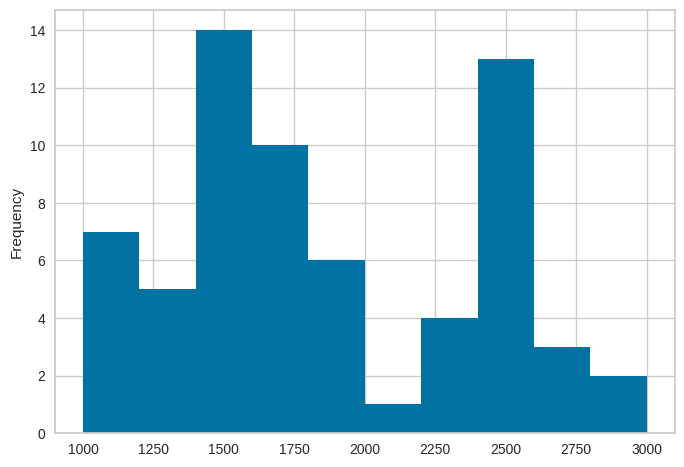

In [46]:
# Check the dataset except for the value of ['Initial VCM_daily_dose']  = 2000
df_temp = df1[df1['Initial VCM_daily_dose'] != 2000]


# the number of remaining data after erasing
print(f'# data: {len(df_temp)}')

# check with histogram
df_temp['Initial VCM_daily_dose'].plot.hist(bins=10)

# data: 424


<Axes: ylabel='Frequency'>

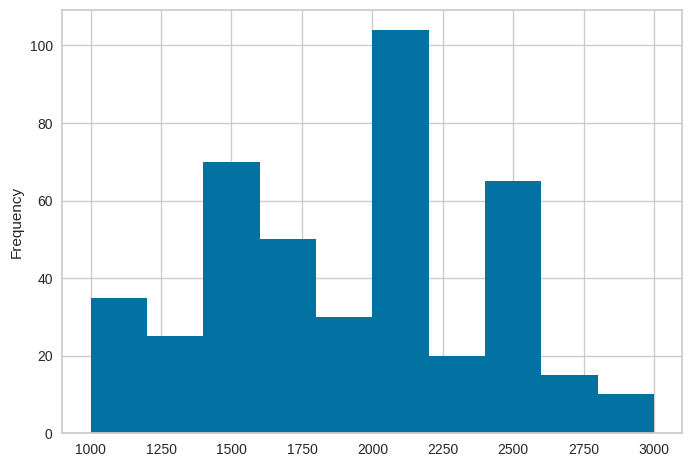

In [47]:
# Amplify other datasets to match data imbalance
# n times data amplification: Amplify the original data using the data 'without' the initial dose value of 2000
# After many attempts, it is reasonable to amplify it by about 4 times.

n = 4
df_list = [df_temp] * n
df_iter = pd.concat(df_list)
df_D = pd.concat([df1, df_iter])


# the number of data after amplification
print(f'# data: {len(df_D)}')

# check with histogram
df_D['Initial VCM_daily_dose'].plot.hist(bins=10)

In [48]:
df_D

,Gender,Age,Weight,Height,BMI,Initial VCM_daily_dose,ICU,WBC,Hb,PLT,...,LAB,AG,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life
0,0,79,69.0,158.0,27.6,1000,0,5.9,7.3,134,...,0,0,1,0,0,110.4,4.8,48.3,0.096,7.2
1,0,74,72.0,163.0,27.1,1000,0,9.5,11.4,286,...,0,0,1,0,0,59.1,2.7,50.4,0.053,13.0
2,0,74,52.0,146.0,24.4,1000,0,97.1,7.2,14,...,0,0,0,0,0,51.3,2.3,36.4,0.047,14.8
3,0,83,48.0,153.0,20.5,1000,0,6.1,8.4,285,...,0,0,0,0,0,32.0,1.5,33.6,0.031,22.4
4,0,88,40.0,148.0,18.3,1000,0,7.4,9.4,221,...,0,1,0,0,0,35.6,1.6,28.0,0.034,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,73,54.0,150.0,24.0,2600,0,12.1,5.5,41,...,0,0,0,0,0,59.3,2.6,37.8,0.054,12.9
160,1,59,53.0,165.0,19.5,2750,0,10.8,10.7,271,...,0,0,0,0,0,91.7,4.0,37.1,0.081,8.6
161,1,63,74.0,168.0,26.2,2760,0,11.2,9.5,130,...,0,0,1,0,0,88.9,3.9,51.8,0.078,8.9
162,0,64,63.0,155.0,26.2,2840,0,6.9,7.5,179,...,0,0,0,0,0,113.0,4.9,44.1,0.098,7.1


In [49]:
augmented_dataset = pd.ExcelWriter('augmented_dataset.xlsx')

In [50]:
df_D.to_excel(augmented_dataset, index=False)

In [51]:
augmented_dataset.save()

In [52]:
files.download('augmented_dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# Model training with amplified data

In [53]:
# The amplified data is randomly corrupted and stored
df_D = df_D.sample(frac=1).reset_index(drop=True)

reg2 = setup(data=df_D,
             target='Initial VCM_daily_dose',
             train_size=0.8,
             fold=5,
             fold_shuffle=True,
             use_gpu=True,
             session_id=42
            )


,Description,Value
0,Session id,42
1,Target,Initial VCM_daily_dose
2,Target type,Regression
3,Original data shape,"(424, 33)"
4,Transformed data shape,"(424, 33)"
5,Transformed train set shape,"(339, 33)"
6,Transformed test set shape,"(85, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


# Evaluation

In [54]:
# find and tune the best model
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,29.0796,6898.4477,81.6594,0.9697,0.0433,0.0145,0.3700
catboost,CatBoost Regressor,62.7350,11455.7905,106.0780,0.9492,0.0575,0.0334,16.5780
xgboost,Extreme Gradient Boosting,43.8438,16759.8443,127.3179,0.9266,0.0734,0.0219,0.4180
lightgbm,Light Gradient Boosting Machine,78.5453,18441.4497,133.4114,0.9196,0.0730,0.0426,0.1360
rf,Random Forest Regressor,83.5444,18527.6147,133.1325,0.9187,0.0735,0.0457,0.4340
gbr,Gradient Boosting Regressor,94.6346,19661.8580,139.2857,0.9129,0.0776,0.0517,0.3560
dt,Decision Tree Regressor,48.3758,27717.5417,158.3504,0.8816,0.0881,0.0242,0.0560
ada,AdaBoost Regressor,211.4077,57862.4148,240.0993,0.7427,0.1414,0.1259,0.2100
lr,Linear Regression,273.4609,118036.2667,342.5725,0.4782,0.1892,0.1556,0.1400
llar,Lasso Least Angle Regression,277.2379,120645.0835,346.4568,0.4665,0.1960,0.1607,0.1020


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [55]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,162.4343,40883.6865,202.1971,0.8099,0.1147,0.0931
1,189.7252,63270.3435,251.5360,0.7449,0.1409,0.1108
2,159.4690,39133.5211,197.8219,0.8177,0.1256,0.1000
3,167.5104,44081.7959,209.9567,0.7878,0.1223,0.0966
4,146.8399,33261.2860,182.3768,0.8639,0.0959,0.0789
Mean,165.1958,44126.1266,208.7777,0.8048,0.1199,0.0959
Std,14.0315,10197.9144,23.1948,0.0389,0.0147,0.0104


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [56]:
# evaluate and make predictions with the best model
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
# assuming the data is already preprocessed and the setup is complete
ensemble = ensemble_model(best_tune, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,67.2224,12732.3152,112.8376,0.9408,0.0594,0.0361
1,98.8097,35167.1596,187.5291,0.8582,0.0911,0.0495
2,74.1362,13246.6544,115.0941,0.9383,0.0684,0.0435
3,78.7100,16131.1110,127.0083,0.9223,0.0781,0.0466
4,67.0169,13513.6761,116.2483,0.9447,0.0612,0.0347
Mean,77.1790,18158.1833,131.7435,0.9209,0.0716,0.0421
Std,11.6781,8585.4401,28.3167,0.0323,0.0117,0.0058


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [58]:
# evaluate and make predictions with the bagging model
evaluate_model(ensemble)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
predictions = predict_model(best_tune)
predictions2 = predict_model(ensemble)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,32.9447,8351.0648,91.3842,0.9653,0.0492,0.0165


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bagging Regressor,48.1688,9855.8595,99.2767,0.9591,0.0544,0.0250


In [60]:
predictions

,Gender,Age,Weight,Height,BMI,ICU,WBC,Hb,PLT,CRP,...,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose,prediction_label
145,0,75,70.0,150.0,31.100000,0,3.9,11.3,115,2.470000,...,0,0,0,79.000000,3.5,49.000000,0.070,9.9,2000,1937.20
280,0,79,48.0,157.0,19.500000,1,7.3,9.0,370,41.070000,...,0,0,0,93.400002,4.0,33.599998,0.082,8.5,1600,1600.00
175,1,57,43.0,172.0,14.500000,0,9.5,8.7,141,101.720001,...,0,0,0,190.699997,8.1,30.100000,0.163,4.3,1200,1200.00
373,1,65,70.0,170.0,24.200001,1,8.3,9.1,339,7.140000,...,0,0,0,98.500000,4.3,49.000000,0.086,8.0,2000,1989.40
420,1,87,55.0,170.0,19.000000,1,10.7,10.1,236,78.449997,...,0,0,0,63.299999,2.8,38.500000,0.057,12.2,2000,1896.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,75,60.0,162.0,22.900000,0,11.5,10.0,218,198.199997,...,0,0,0,86.900002,3.8,42.000000,0.077,9.1,2400,2400.00
415,1,66,75.0,178.0,23.700001,0,0.1,6.6,16,33.709999,...,0,0,0,89.599998,4.0,52.500000,0.079,8.8,2000,2091.90
24,0,58,60.0,160.0,23.400000,1,19.9,11.0,393,90.570000,...,0,0,0,98.400002,4.3,42.000000,0.086,8.0,2000,1966.20
17,0,82,51.0,135.0,28.000000,0,6.9,14.2,186,1.000000,...,0,0,0,57.200001,2.5,35.700001,0.052,13.3,1500,1500.00


In [61]:
# round off the prediction values to the nearest fifty
rounded_values = [round_to_nearest_fifty(num) for num in predictions['prediction_label']]

predictions["prediction_label"]= rounded_values

# create a dataframe to hold the true and predicted values
df_result = pd.DataFrame()
df_result['true'] = predictions['Initial VCM_daily_dose']
df_result['prediction'] = predictions['prediction_label']

In [62]:
predictions

,Gender,Age,Weight,Height,BMI,ICU,WBC,Hb,PLT,CRP,...,TZP,FLC,FQ,Crcl,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose,prediction_label
145,0,75,70.0,150.0,31.100000,0,3.9,11.3,115,2.470000,...,0,0,0,79.000000,3.5,49.000000,0.070,9.9,2000,1950
280,0,79,48.0,157.0,19.500000,1,7.3,9.0,370,41.070000,...,0,0,0,93.400002,4.0,33.599998,0.082,8.5,1600,1600
175,1,57,43.0,172.0,14.500000,0,9.5,8.7,141,101.720001,...,0,0,0,190.699997,8.1,30.100000,0.163,4.3,1200,1200
373,1,65,70.0,170.0,24.200001,1,8.3,9.1,339,7.140000,...,0,0,0,98.500000,4.3,49.000000,0.086,8.0,2000,2000
420,1,87,55.0,170.0,19.000000,1,10.7,10.1,236,78.449997,...,0,0,0,63.299999,2.8,38.500000,0.057,12.2,2000,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,75,60.0,162.0,22.900000,0,11.5,10.0,218,198.199997,...,0,0,0,86.900002,3.8,42.000000,0.077,9.1,2400,2400
415,1,66,75.0,178.0,23.700001,0,0.1,6.6,16,33.709999,...,0,0,0,89.599998,4.0,52.500000,0.079,8.8,2000,2100
24,0,58,60.0,160.0,23.400000,1,19.9,11.0,393,90.570000,...,0,0,0,98.400002,4.3,42.000000,0.086,8.0,2000,1950
17,0,82,51.0,135.0,28.000000,0,6.9,14.2,186,1.000000,...,0,0,0,57.200001,2.5,35.700001,0.052,13.3,1500,1500


In [63]:
df_result['prediction']

145    1950
280    1600
175    1200
373    2000
420    1900
       ... 
57     2400
415    2100
24     1950
17     1500
66     1500
Name: prediction, Length: 85, dtype: int64

# Results

In [64]:
df_result['accuracy'] = np.where(abs(df_result['true'] - df_result['prediction']) <= 50, 1, 0)
accuracy = round((len(df_result.loc[df_result['accuracy'] == 1])/ len(df_result)) * 100, 1)
print('Accuracy: ', accuracy, '%')


Accuracy:  85.9 %


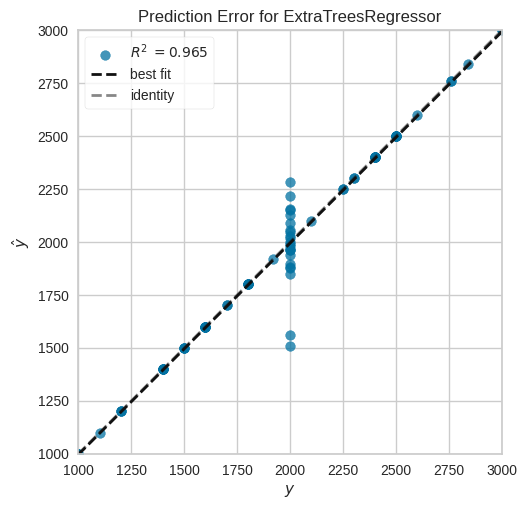

In [65]:
plot_model(best_tune, plot = 'error')

# Feature engineering using SHAP

In [66]:
# create a shap explainer object
explainer = shap.Explainer(best_tune)

In [67]:
# calculate shap values on your data
shap_values = explainer.shap_values(df_D)

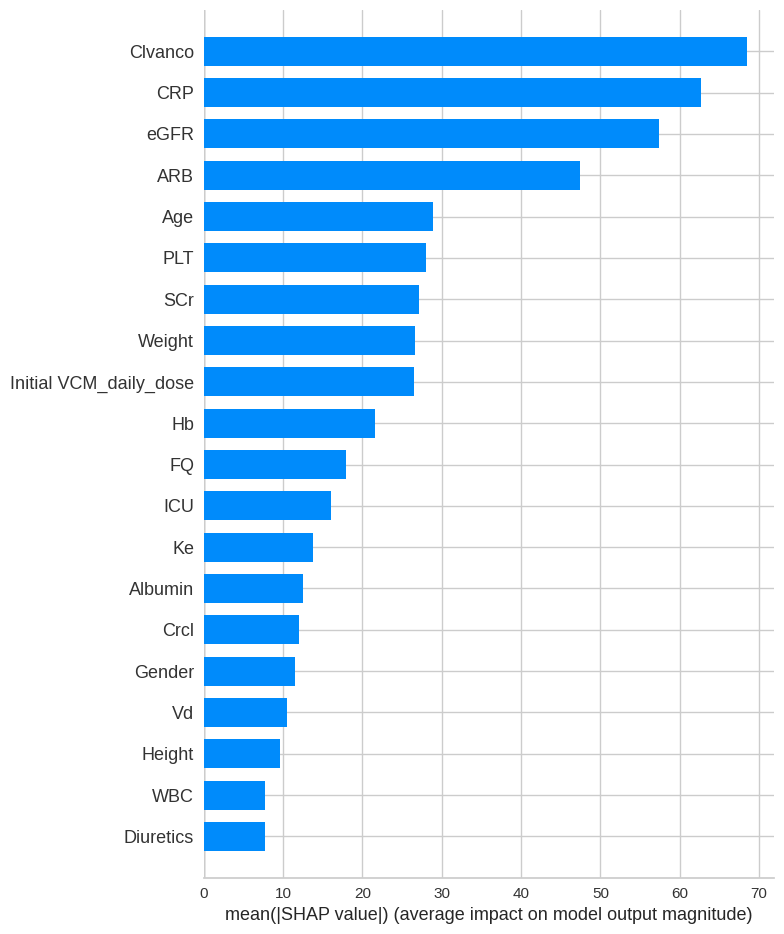

In [68]:
# plot the shap values
shap.summary_plot(shap_values, df_D, plot_type="bar" )

In [69]:
# get feature importance
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance = pd.Series(feature_importance, index=df_D.columns)

# get top 10 important features
top_10_features = feature_importance.sort_values(ascending=False)[:10].index

# create a new dataframe with only the top 10 important features
df_D_important = df_D[top_10_features]

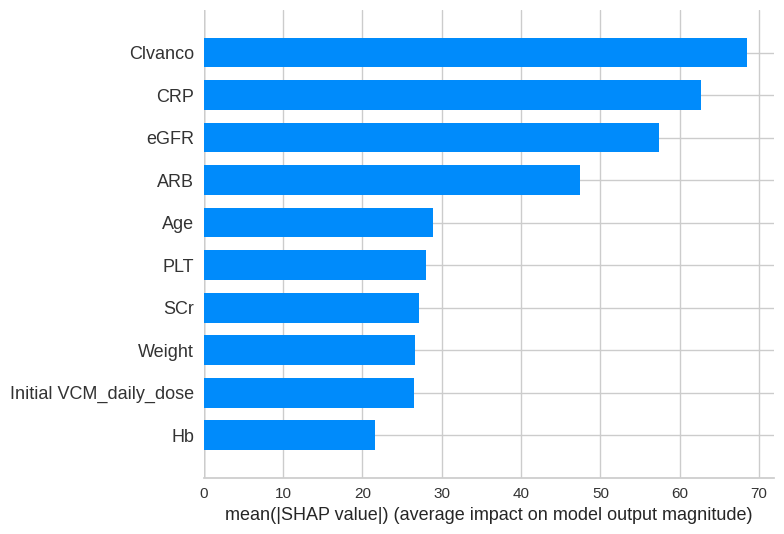

In [70]:
# get indices of the selected features
selected_features_indices = [df_D.columns.tolist().index(feature) for feature in top_10_features]

# plot SHAP values of the selected features
shap.summary_plot(shap_values[:, selected_features_indices], df_D[top_10_features], plot_type="bar" )

# Feature selection based on pycaret & SHAP feature importance

In [71]:
Pycaret_Feature_importance = ['Weight', 'Vd', 'Age', 'BUN', 'Half_life', 'eGFR', 'Height','Clvanco', 'Ke', 'ACEi' ]
SHAP_Feature_importance = ['Clvanco', 'CRP', 'eGFR', 'ARB', 'Age', 'PLT','SCr', 'Weight', 'Hb','Gender']

# Convert the lists to sets and union them
union_set = set(Pycaret_Feature_importance) | set(SHAP_Feature_importance)

# Convert the result back to a list
union_list = list(union_set)
union_list

['SCr',
 'CRP',
 'Hb',
 'Height',
 'PLT',
 'Clvanco',
 'Gender',
 'Weight',
 'Ke',
 'eGFR',
 'Vd',
 'Age',
 'BUN',
 'ACEi',
 'Half_life',
 'ARB']

In [72]:
df_D2 = df_D[union_list].copy()
df_D2 = df_D2[['Gender', 'Age', 'Weight', 'Height', 'Hb', 'PLT', 'CRP', 'eGFR', 'BUN', 'SCr','ACEi', 'ARB', 'Clvanco', 'Vd', 'Ke', 'Half_life']]
df_D2['Initial VCM_daily_dose'] = df_D['Initial VCM_daily_dose']
df_D2

,Gender,Age,Weight,Height,Hb,PLT,CRP,eGFR,BUN,SCr,ACEi,ARB,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose
0,1,48,80.0,171.0,10.1,396,113.99,90,6.7,0.67,0,0,6.6,56.0,0.131,5.3,2300
1,1,55,85.0,180.0,8.5,501,84.08,82,10.4,0.95,0,0,4.7,59.5,0.092,7.5,2400
2,0,91,41.0,148.0,7.4,159,34.18,52,32.3,1.00,0,0,1.1,28.7,0.024,28.8,1380
3,0,82,50.0,150.0,10.4,228,159.65,90,10.3,0.40,0,1,3.7,35.0,0.075,9.2,1400
4,1,59,53.0,165.0,10.7,271,94.45,90,7.7,0.65,0,0,4.0,37.1,0.081,8.6,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0,79,65.0,160.0,10.4,646,23.85,90,21.6,0.55,0,1,3.7,45.5,0.075,9.2,2000
420,1,87,55.0,170.0,10.1,236,78.45,90,19.8,0.64,0,0,2.8,38.5,0.057,12.2,2000
421,1,69,64.0,164.0,12.8,196,1.62,90,13.0,0.76,0,0,3.7,44.8,0.073,9.5,1920
422,1,68,56.0,165.0,9.1,97,241.25,90,36.1,0.67,0,0,3.7,39.2,0.074,9.4,2400


In [73]:
reg3 = setup(data=df_D2,
             target='Initial VCM_daily_dose',
             train_size=0.8,
             fold=5,
             fold_shuffle=True,
             use_gpu=True,
             session_id=42
            )


,Description,Value
0,Session id,42
1,Target,Initial VCM_daily_dose
2,Target type,Regression
3,Original data shape,"(424, 17)"
4,Transformed data shape,"(424, 17)"
5,Transformed train set shape,"(339, 17)"
6,Transformed test set shape,"(85, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [74]:
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,32.7330,8448.4357,90.6314,0.9624,0.0487,0.0164,0.5820
catboost,CatBoost Regressor,70.1039,12964.0476,113.3012,0.9420,0.0603,0.0373,15.4460
xgboost,Extreme Gradient Boosting,44.0893,15773.4999,124.1347,0.9312,0.0683,0.0220,0.3720
rf,Random Forest Regressor,83.4678,20405.1258,139.1228,0.9106,0.0766,0.0453,0.3960
lightgbm,Light Gradient Boosting Machine,87.0170,21110.5666,143.8148,0.9072,0.0786,0.0473,0.1340
gbr,Gradient Boosting Regressor,97.0267,21192.8142,143.4407,0.9060,0.0793,0.0530,0.3840
dt,Decision Tree Regressor,58.9993,38089.0770,194.0381,0.8291,0.0989,0.0295,0.0560
ada,AdaBoost Regressor,222.0381,64359.1327,253.1814,0.7131,0.1473,0.1314,0.3300
llar,Lasso Least Angle Regression,309.7090,140312.7310,373.6653,0.3798,0.2120,0.1796,0.0620
lasso,Lasso Regression,309.7100,140313.9460,373.6664,0.3798,0.2120,0.1796,0.0620


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [75]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,138.4744,32343.0653,179.8418,0.8496,0.1018,0.0784
1,184.2888,61969.6985,248.9371,0.7501,0.1434,0.1076
2,153.4366,36494.7437,191.0360,0.8300,0.1198,0.0953
3,158.3576,37017.0786,192.3982,0.8218,0.1135,0.0925
4,140.5048,33288.2305,182.4506,0.8638,0.1026,0.0773
Mean,155.0125,40222.5633,198.9327,0.8231,0.1162,0.0902
Std,16.4606,11020.7179,25.4622,0.0393,0.0152,0.0113


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [76]:
# evaluate and make predictions with the best model
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
predictions = predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,28.5347,7675.5623,87.6103,0.9681,0.0476,0.0143


In [78]:
# round off the prediction values to the nearest fifty
rounded_values = [round_to_nearest_fifty(num) for num in df_result['prediction']]

predictions["prediction_label"]= rounded_values

# create a dataframe to hold the true and predicted values
df_result = pd.DataFrame()
df_result['true'] = predictions['Initial VCM_daily_dose']
df_result['prediction'] = predictions['prediction_label']

In [79]:
predictions

,Gender,Age,Weight,Height,Hb,PLT,CRP,eGFR,BUN,SCr,ACEi,ARB,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose,prediction_label
145,0,75,70.0,150.0,11.3,115,2.470000,84,14.800000,0.68,0,0,3.5,49.000000,0.070,9.9,2000,1950
280,0,79,48.0,157.0,9.0,370,41.070000,90,11.700000,0.37,0,1,4.0,33.599998,0.082,8.5,1600,1600
175,1,57,43.0,172.0,8.7,141,101.720001,90,3.900000,0.26,0,0,8.1,30.100000,0.163,4.3,1200,1200
373,1,65,70.0,170.0,9.1,339,7.140000,90,10.200000,0.74,0,0,4.3,49.000000,0.086,8.0,2000,2000
420,1,87,55.0,170.0,10.1,236,78.449997,90,19.799999,0.64,0,0,2.8,38.500000,0.057,12.2,2000,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,75,60.0,162.0,10.0,218,198.199997,90,7.900000,0.53,0,0,3.8,42.000000,0.077,9.1,2400,2400
415,1,66,75.0,178.0,6.6,16,33.709999,89,27.700001,0.86,0,0,4.0,52.500000,0.079,8.8,2000,2100
24,0,58,60.0,160.0,11.0,393,90.570000,90,20.700001,0.59,0,1,4.3,42.000000,0.086,8.0,2000,1950
17,0,82,51.0,135.0,14.2,186,1.000000,90,12.300000,0.61,0,0,2.5,35.700001,0.052,13.3,1500,1500


In [80]:
df_result['accuracy'] = np.where(abs(df_result['true'] - df_result['prediction']) <= 50, 1, 0)
accuracy = round((len(df_result.loc[df_result['accuracy'] == 1])/ len(df_result)) * 100, 1)
print('Accuracy: ', accuracy, '%')


Accuracy:  85.9 %


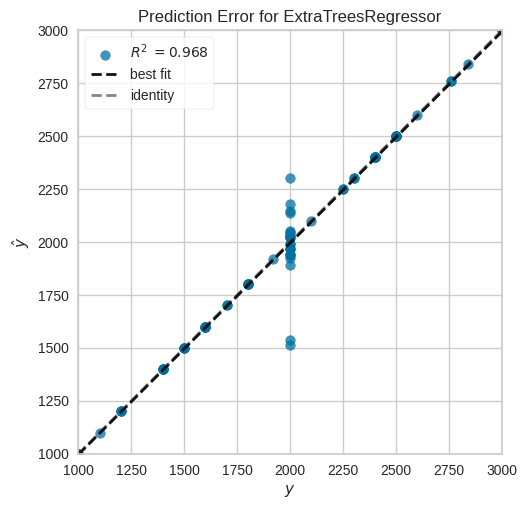

In [81]:
plot_model(best_tune, plot = 'error')

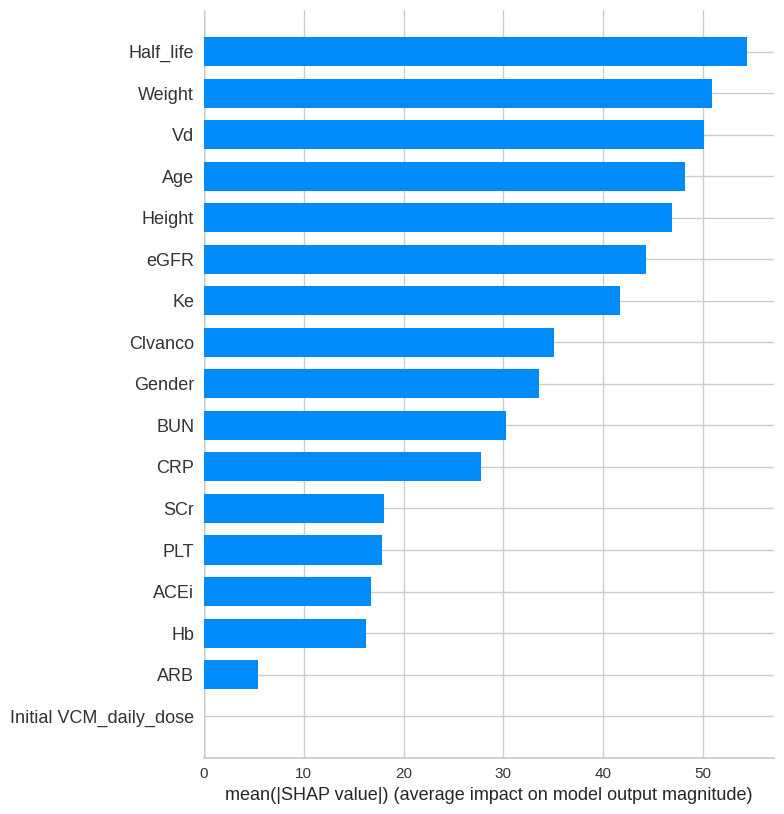

In [82]:
explainer = shap.Explainer(best_tune)
shap_values = explainer.shap_values(df_D2)
shap.summary_plot(shap_values, df_D2, plot_type="bar" )

# Log Transformation of augmented dataset of 'Initial VCM_daily_dose'

In [83]:
df_D2['Initial VCM_daily_dose']

0      2300
1      2400
2      1380
3      1400
4      2750
       ... 
419    2000
420    2000
421    1920
422    2400
423    2000
Name: Initial VCM_daily_dose, Length: 424, dtype: int64

In [84]:
df_D2['Initial VCM_daily_dose_log'] = df_D2['Initial VCM_daily_dose'].apply(lambda x: math.log(x))
df_D2

,Gender,Age,Weight,Height,Hb,PLT,CRP,eGFR,BUN,SCr,ACEi,ARB,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose,Initial VCM_daily_dose_log
0,1,48,80.0,171.0,10.1,396,113.99,90,6.7,0.67,0,0,6.6,56.0,0.131,5.3,2300,7.740664
1,1,55,85.0,180.0,8.5,501,84.08,82,10.4,0.95,0,0,4.7,59.5,0.092,7.5,2400,7.783224
2,0,91,41.0,148.0,7.4,159,34.18,52,32.3,1.00,0,0,1.1,28.7,0.024,28.8,1380,7.229839
3,0,82,50.0,150.0,10.4,228,159.65,90,10.3,0.40,0,1,3.7,35.0,0.075,9.2,1400,7.244228
4,1,59,53.0,165.0,10.7,271,94.45,90,7.7,0.65,0,0,4.0,37.1,0.081,8.6,2750,7.919356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0,79,65.0,160.0,10.4,646,23.85,90,21.6,0.55,0,1,3.7,45.5,0.075,9.2,2000,7.600902
420,1,87,55.0,170.0,10.1,236,78.45,90,19.8,0.64,0,0,2.8,38.5,0.057,12.2,2000,7.600902
421,1,69,64.0,164.0,12.8,196,1.62,90,13.0,0.76,0,0,3.7,44.8,0.073,9.5,1920,7.560080
422,1,68,56.0,165.0,9.1,97,241.25,90,36.1,0.67,0,0,3.7,39.2,0.074,9.4,2400,7.783224


<Axes: ylabel='Frequency'>

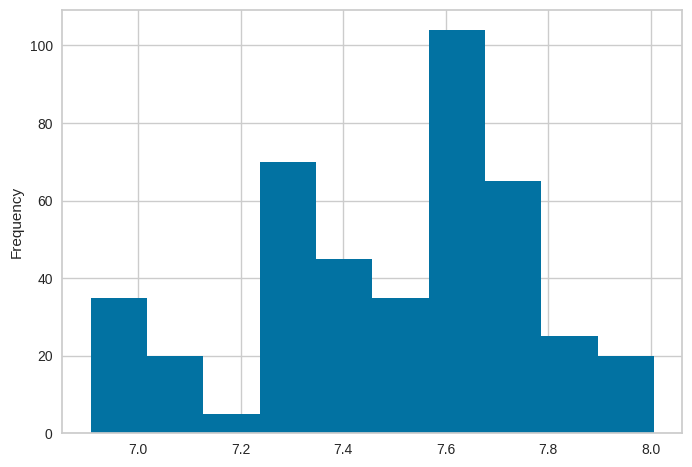

In [85]:
df_D2['Initial VCM_daily_dose_log'].plot.hist(bins=10)

In [86]:
df_D3=df_D2.drop(columns='Initial VCM_daily_dose')

In [87]:
reg4 = setup(data=df_D3,
             target='Initial VCM_daily_dose_log',
             train_size=0.8,
             fold=5,
             fold_shuffle=True,
             use_gpu=True,
             session_id=42
            )


,Description,Value
0,Session id,42
1,Target,Initial VCM_daily_dose_log
2,Target type,Regression
3,Original data shape,"(424, 17)"
4,Transformed data shape,"(424, 17)"
5,Transformed train set shape,"(339, 17)"
6,Transformed test set shape,"(85, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [88]:
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0183,0.0032,0.0552,0.9572,0.0065,0.0024,0.5880
xgboost,Extreme Gradient Boosting,0.0232,0.0042,0.0631,0.9433,0.0074,0.0031,0.3680
catboost,CatBoost Regressor,0.0388,0.0043,0.0646,0.9422,0.0076,0.0051,16.5100
lightgbm,Light Gradient Boosting Machine,0.0475,0.0063,0.0783,0.9155,0.0092,0.0063,0.1420
rf,Random Forest Regressor,0.0474,0.0072,0.0821,0.9048,0.0097,0.0063,0.6100
gbr,Gradient Boosting Regressor,0.0538,0.0072,0.0840,0.9036,0.0099,0.0071,0.5500
dt,Decision Tree Regressor,0.0301,0.0098,0.0977,0.8651,0.0115,0.0040,0.0620
ada,AdaBoost Regressor,0.1153,0.0174,0.1319,0.7637,0.0155,0.0154,0.4640
lr,Linear Regression,0.1719,0.0433,0.2073,0.4174,0.0245,0.0230,0.1080
ridge,Ridge Regression,0.1737,0.0439,0.2088,0.4099,0.0248,0.0233,0.1080


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [89]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0888,0.0129,0.1134,0.8039,0.0134,0.0118
1,0.1278,0.0263,0.1621,0.6808,0.0193,0.0172
2,0.1034,0.0167,0.1292,0.7658,0.0155,0.0140
3,0.0970,0.0142,0.1191,0.8096,0.0142,0.0130
4,0.0941,0.0153,0.1236,0.8003,0.0146,0.0125
Mean,0.1022,0.0171,0.1295,0.7721,0.0154,0.0137
Std,0.0136,0.0048,0.0171,0.0482,0.0021,0.0019


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [90]:
# evaluate and make predictions with the best model
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [91]:
predictions = predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0162,0.0025,0.0497,0.9677,0.0058,0.0021


In [92]:
predictions

,Gender,Age,Weight,Height,Hb,PLT,CRP,eGFR,BUN,SCr,ACEi,ARB,Clvanco,Vd,Ke,Half_life,Initial VCM_daily_dose_log,prediction_label
145,0,75,70.0,150.0,11.3,115,2.470000,84,14.800000,0.68,0,0,3.5,49.000000,0.070,9.9,7.600903,7.594826
280,0,79,48.0,157.0,9.0,370,41.070000,90,11.700000,0.37,0,1,4.0,33.599998,0.082,8.5,7.377759,7.377759
175,1,57,43.0,172.0,8.7,141,101.720001,90,3.900000,0.26,0,0,8.1,30.100000,0.163,4.3,7.090077,7.090077
373,1,65,70.0,170.0,9.1,339,7.140000,90,10.200000,0.74,0,0,4.3,49.000000,0.086,8.0,7.600903,7.630908
420,1,87,55.0,170.0,10.1,236,78.449997,90,19.799999,0.64,0,0,2.8,38.500000,0.057,12.2,7.600903,7.539718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,75,60.0,162.0,10.0,218,198.199997,90,7.900000,0.53,0,0,3.8,42.000000,0.077,9.1,7.783224,7.783224
415,1,66,75.0,178.0,6.6,16,33.709999,89,27.700001,0.86,0,0,4.0,52.500000,0.079,8.8,7.600903,7.673586
24,0,58,60.0,160.0,11.0,393,90.570000,90,20.700001,0.59,0,1,4.3,42.000000,0.086,8.0,7.600903,7.616061
17,0,82,51.0,135.0,14.2,186,1.000000,90,12.300000,0.61,0,0,2.5,35.700001,0.052,13.3,7.313221,7.313221


In [93]:
df_result = pd.DataFrame()
df_result['Initial VCM_daily_dose_log'] = predictions['Initial VCM_daily_dose_log']
df_result['prediction_label_log']=predictions['prediction_label']

In [94]:
index_list = [145, 280, 175, 373, 420, 73, 132, 137, 30, 72, 70, 94, 316, 90, 376, 416, 9, 247, 196, 231, 192, 239, 350, 228, 55, 356, 56, 298, 272, 79, 331, 116, 208, 194, 340, 184, 218, 39, 168, 364, 75, 76, 419, 33, 113, 402, 148, 283, 371, 15, 78, 261, 0, 19, 271, 336, 281, 278, 77, 82, 360, 104, 25, 383, 172, 370, 312, 42, 173, 274, 124, 296, 297, 374, 22, 46, 285, 93, 410, 412, 57, 415, 24, 17, 66]
index_series = pd.Series(index_list)  # Convert the list to a pandas Series

# List comprehension to store values
value_list = [df_D2.loc[index, 'Initial VCM_daily_dose'] for index in index_series]

print(value_list)



[2000, 1600, 1200, 2000, 2000, 1400, 2840, 2400, 1800, 1000, 2000, 2300, 1800, 1920, 1700, 3000, 2000, 1600, 2000, 1200, 1000, 1600, 2760, 1600, 2100, 2000, 2400, 1000, 1600, 2400, 2500, 1600, 1000, 2000, 2250, 1400, 2000, 1000, 1800, 1700, 2000, 2500, 2000, 1600, 1800, 3000, 2000, 1200, 1400, 2500, 2400, 2000, 2300, 1000, 2000, 2400, 1100, 1400, 2000, 1500, 2000, 2400, 2760, 2000, 1400, 1400, 1800, 2600, 2500, 2000, 2000, 1500, 2500, 2250, 2500, 2400, 2500, 1800, 2000, 2000, 2400, 2000, 2000, 1500, 1500]


In [95]:
df_result['Initial VCM_daily_dose']=value_list
df_result

,Initial VCM_daily_dose_log,prediction_label_log,Initial VCM_daily_dose
145,7.600903,7.594826,2000
280,7.377759,7.377759,1600
175,7.090077,7.090077,1200
373,7.600903,7.630908,2000
420,7.600903,7.539718,2000
...,...,...,...
57,7.783224,7.783224,2400
415,7.600903,7.673586,2000
24,7.600903,7.616061,2000
17,7.313221,7.313221,1500


In [96]:
df_result['prediction'] = np.exp(df_result['prediction_label_log'])

In [97]:
df_result

,Initial VCM_daily_dose_log,prediction_label_log,Initial VCM_daily_dose,prediction
145,7.600903,7.594826,2000,1987.884370
280,7.377759,7.377759,1600,1600.000115
175,7.090077,7.090077,1200,1200.000105
373,7.600903,7.630908,2000,2060.920649
420,7.600903,7.539718,2000,1881.298901
...,...,...,...,...
57,7.783224,7.783224,2400,2400.000215
415,7.600903,7.673586,2000,2150.780775
24,7.600903,7.616061,2000,2030.548697
17,7.313221,7.313221,1500,1500.000171


In [98]:
# round off the prediction values to the nearest fifty
rounded_values = [round_to_nearest_fifty(num) for num in df_result['prediction']]
df_result['prediction']= rounded_values
df_result

,Initial VCM_daily_dose_log,prediction_label_log,Initial VCM_daily_dose,prediction
145,7.600903,7.594826,2000,2000
280,7.377759,7.377759,1600,1600
175,7.090077,7.090077,1200,1200
373,7.600903,7.630908,2000,2050
420,7.600903,7.539718,2000,1900
...,...,...,...,...
57,7.783224,7.783224,2400,2400
415,7.600903,7.673586,2000,2150
24,7.600903,7.616061,2000,2050
17,7.313221,7.313221,1500,1500


In [99]:
df_result['accuracy'] = np.where(abs(df_result['Initial VCM_daily_dose'] - df_result['prediction']) < 100, 1, 0)
accuracy = round((len(df_result.loc[df_result['accuracy'] == 1])/ len(df_result)) * 100, 1)
print('Accuracy: ', accuracy, '%')

Accuracy:  87.1 %


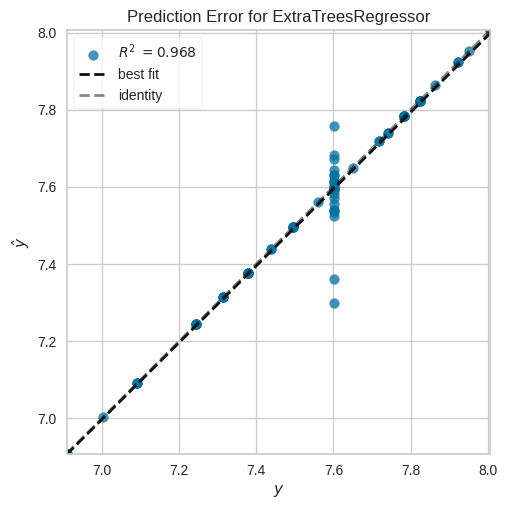

In [100]:
plot_model(best_tune, plot = 'error')

In [101]:
final_VancoAI = finalize_model(estimator=best_tune)

In [102]:
save_model(model=final_VancoAI,
           model_name='final_VancoAI',
           verbose=False)

(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Gender', 'Age', 'Weight',
                                              'Height', 'Hb', 'PLT', 'CRP',
                                              'eGFR', 'BUN', 'SCr', 'ACEi',
                                              'ARB', 'Clvanco', 'Vd', 'Ke',
                                              'Half_life'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=42))]),
 'final_VancoAI.pkl')

In [103]:
from pycaret.regression import load_model